In [25]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax
from sklearn.preprocessing import StandardScaler

In [26]:
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

Initializing variables and reading datasets

In [53]:
dsets = []
accelpedal = []
driverdem = []
engtorque = []
path = r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_engine_sys_data'

In [66]:
for i in range(32):
    dsets.append(pd.read_csv(path + '\\final_engine_dset_' + str(i)+'.csv'))            #Moving averages are taken to smoothen the data
    vals = moving_avg(dsets[i]['61443-91'])
    accelpedal.append(vals[::100])
    vals = moving_avg(dsets[i]['61444-512'])
    driverdem.append(vals[::100])
    vals = moving_avg(dsets[i]['61444-512'])
    engtorque.append(vals[::100])

for i in range(6):
    dsets.append(pd.read_csv(path + '\\faulty_engine_dset_' + str(i)+'.csv'))
    vals = moving_avg(dsets[32+i]['61443-91'][::100])                           #fix this
    accelpedal.append(vals[::100])
    vals = moving_avg(dsets[32+i]['61444-512'])
    driverdem.append(vals[::100])
    vals = moving_avg(dsets[32+i]['61444-512'])
    engtorque.append(vals[::100])

Reshape and format the datasets to be timeseries

In [67]:
formatted_pedal = to_time_series_dataset(accelpedal)
formatted_demand = to_time_series_dataset(driverdem)
formatted_torque = to_time_series_dataset(engtorque)
print("Accelerator Pedal Position Shape: " + str(formatted_pedal.shape))
print("Driver\'s Demand Torque Shape: " + str(formatted_demand.shape))
print("Actual Engine Torque Shape: " + str(formatted_torque.shape))

Accelerator Pedal Position Shape: (114, 1258, 1)
Driver's Demand Torque Shape: (114, 1258, 1)
Actual Engine Torque Shape: (114, 1258, 1)


Plotting the timeseries

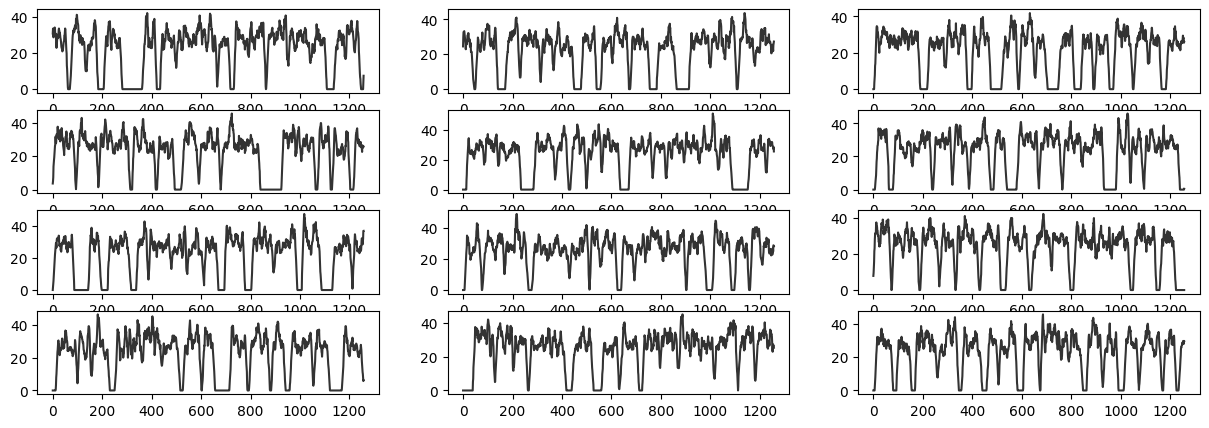

In [64]:
#Normal Accel Pedal
plt.figure(figsize=(15,5))
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(formatted_pedal[yi].ravel(), "k-", alpha=.8)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))

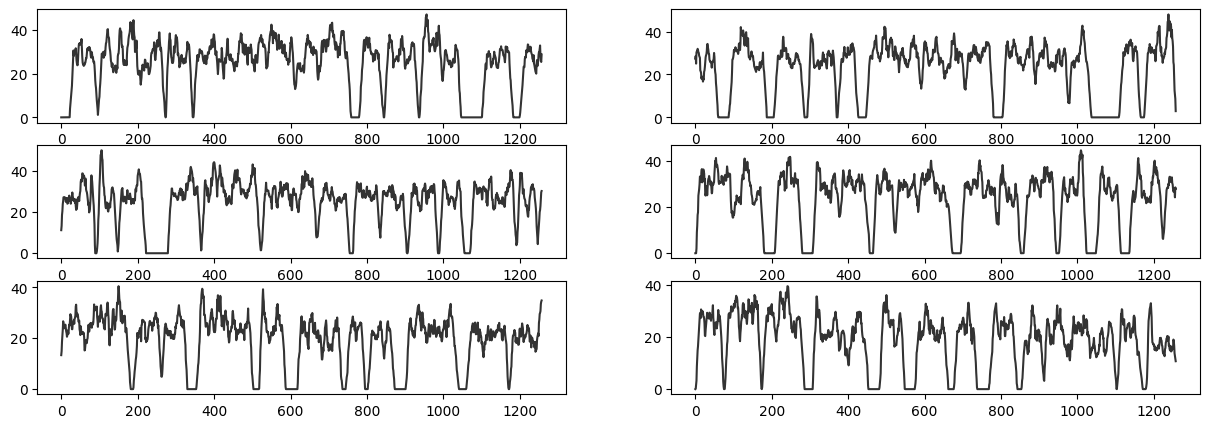

In [68]:
#Some Accel Pedal with Faults 
plt.figure(figsize=(15,5))
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    plt.plot(formatted_pedal[32+yi].ravel(), "k-", alpha=.8)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))

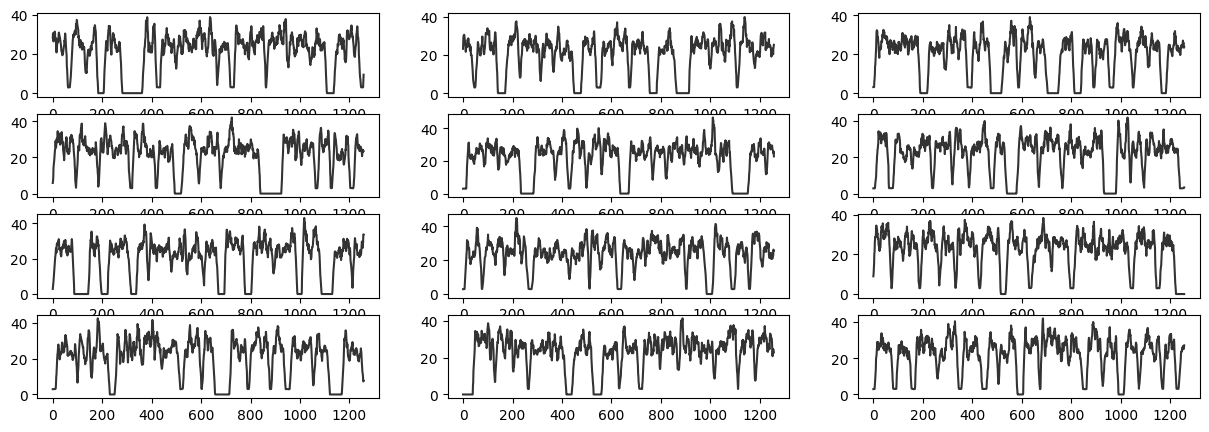

In [58]:
#Normal Driver's Demand
plt.figure(figsize=(15,5))
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(formatted_demand[yi].ravel(), "k-", alpha=.8)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))

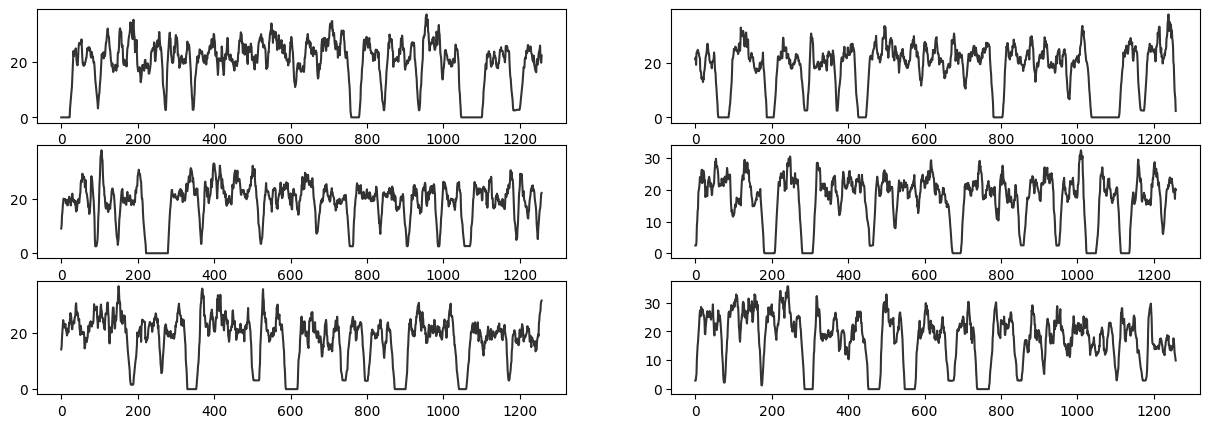

In [59]:
#Some Driver's Demand with Faults
plt.figure(figsize=(15,5))
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    plt.plot(formatted_demand[32+yi].ravel(), "k-", alpha=.8)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))

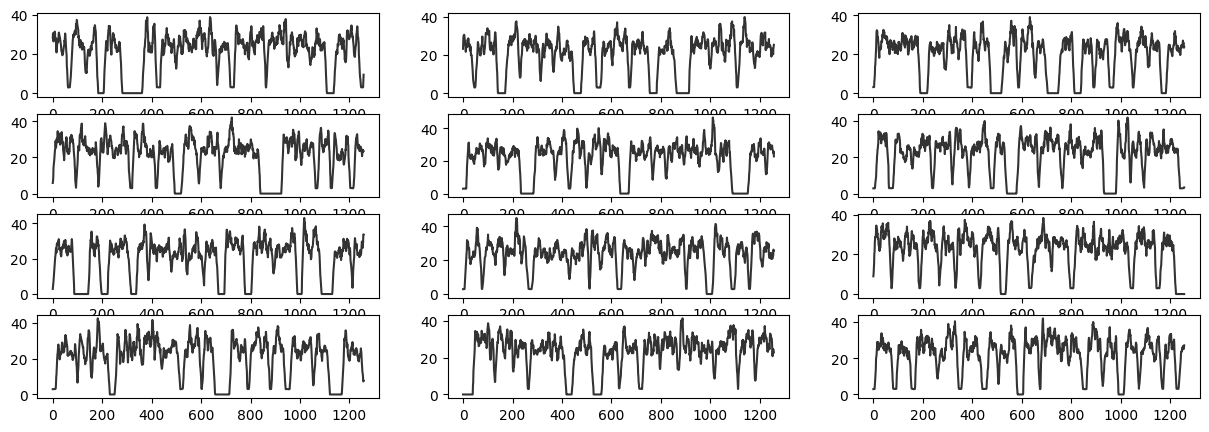

In [60]:
#Normal Actual Engine Torque
plt.figure(figsize=(15,5))
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(formatted_torque[yi].ravel(), "k-", alpha=.8)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))

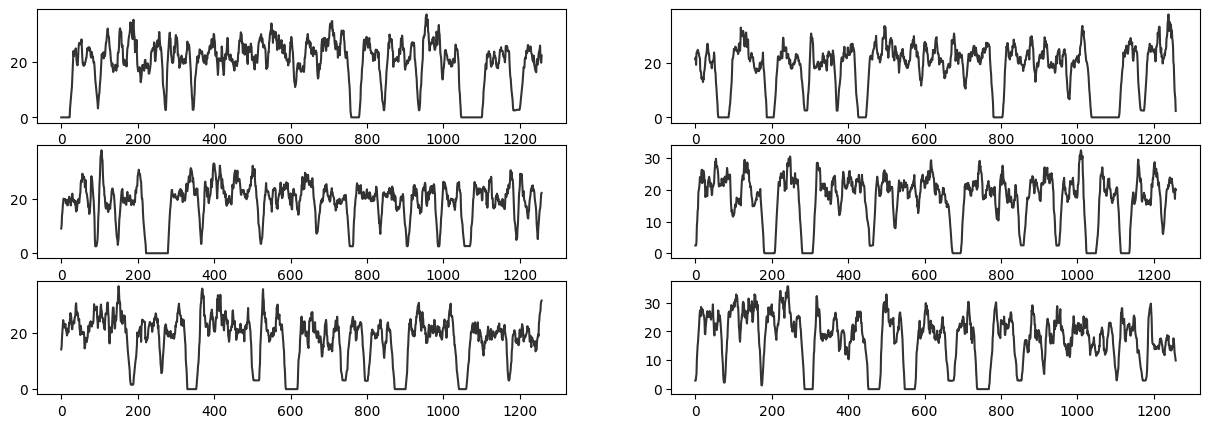

In [61]:
#Some Actual Engine with Faults 
plt.figure(figsize=(15,5))
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    plt.plot(formatted_torque[32+yi].ravel(), "k-", alpha=.8)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))